In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [88]:
X = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
y = iris['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [89]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [90]:
target_names = {i: iris['target_names'][i] for i in range(3)}
target_names

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [91]:
X = X[y != 0]
y = y[y != 0]

In [92]:
y = (y==2).astype(np.int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [104]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### 1. Логистическая регрессия sklearn

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
# для того, чтобы получить логистсическую регрессию без регуляризации
# установим для гиперпараметра C как можно большее значение.
lrc = LogisticRegression(C=10e10, solver='liblinear')
lrc.fit(X_train, y_train)

LogisticRegression(C=100000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [107]:
lrc.intercept_, lrc.coef_

(array([-39.2254719]),
 array([[-2.51006917, -6.48696321,  8.87100976, 17.71154707]]))

In [108]:
y_prob_lrc = lrc.predict_proba(X_test)[:,1]
y_pred_lrc = lrc.predict(X_test)

In [109]:
from sklearn.metrics import confusion_matrix, mean_squared_error

In [110]:
mean_squared_error(y_test, y_prob_lrc)

0.00010790968285760969

In [111]:
confusion_matrix(y_pred_lrc, y_test)

array([[10,  0],
       [ 0, 10]])

### 2. Логистичекская регрессия - градиентный спуск

In [112]:
def grad_descent(X, y, n=20000, learn_rate = 0.5):
    """
    Функция для нахождения оптимальных значений к-ов theta методом градиентного спуска.
    Также функция возвращает историю изменения квадратов ошибок и к-ов theta_3 и theta_4.
    """
    # присвоим theta начальные значения
    theta = np.ones((X.shape[1]+1,))
    # количество образцов
    m = X.shape[0]
    # скорость обучения
    # список с суммами квадратов ошибок
    mse_list = []
    # добавим столбец с единицами к матрице признаков
    X_ones = np.c_[(np.ones((X.shape[0],)), X)]
    # скорость обучения, деленная на количество образцов
    learn_rate_per_m = learn_rate/m
    # список с историей изменений theta_3 и theta_4 
    theta_history = [(1, 1)]

    for i in range(n):
        # вектор ошибок
        errors = sigmoid(X_ones.dot(theta)) - y
        # сумма квадратов ошибок
        mse = errors.T.dot(errors)
        mse_list.append(mse)
        theta -= learn_rate_per_m*X_ones.T.dot(errors)
        theta_history.append((theta[3], theta[4]))
    theta_history = np.array(theta_history)
    
    return theta, theta_history, mse_list

In [113]:
theta_grad_desc, theta_history_grad_desc, mse_list_grad_desc = grad_descent(X_train, y_train)

In [114]:
def plot_descent(theta_history):   
    '''
    Функция для печати графика изменения theta_3 и theta_4
    '''
    plt.figure(figsize=(10,10))
    plt.plot(theta_history[:,0][::5], theta_history[:,1][::5])
    plt.scatter(theta_history[0,0], theta_history[0,1], c='g', marker='o', s=200, label='начало')
    plt.scatter(theta_history[-1,0], theta_history[-1,1], c='r', marker='x', s=200, label='конец')
    # значения к-ов, полученные с помощью sklearn logistic regression
    plt.scatter(lrc.coef_[0][2], lrc.coef_[0][3], c='k', s=100, label='logreg')
    plt.xlabel(f'$\\theta_3$ ({X.columns[2]})', fontsize=15)
    plt.ylabel(f'$\\theta_4$ ({X.columns[3]})', fontsize=15)
    plt.legend(loc='upper left')
    plt.axis('equal')

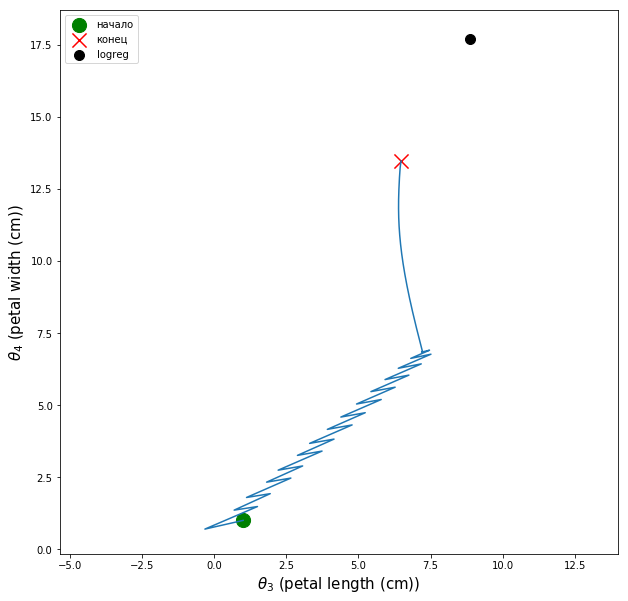

In [115]:
plot_descent(theta_history_grad_desc)

По графику видно, что при градиентном спуске параметры theta сильно осциллируют вначале и в конце уже плавно спускаются к минимуму.

In [116]:
def plot_mse_changing(mse_list):
    '''
    Функция для печати графика изменения суммы квадратов ошибок
    '''
    fig = plt.figure(figsize=(14,6))
    ax = plt.plot(mse_list)
    plt.xscale('log')

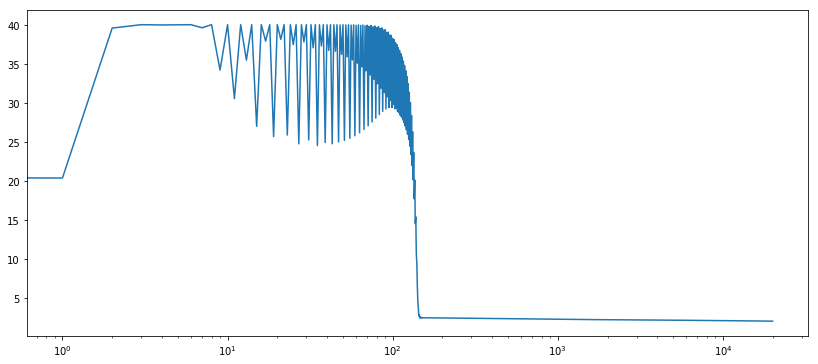

In [117]:
plot_mse_changing(mse_list_grad_desc)

Точно такая же ситуация с суммой квадратов ошибок (вначале сильное колебание и затем плавное уменьшение)

In [118]:
def predict_proba(X, theta):
    '''
    Функция для расчета вероятности принадлежности к классу 1.
    '''
    return sigmoid(np.c_[(np.ones((X.shape[0],)), X)].dot(theta))

def predict(X, theta):
    '''
    Функция для предсказания целевого класса.
    '''
    y_prob = sigmoid(np.c_[(np.ones((X.shape[0],)), X)].dot(theta))
    return (y_prob > 0.5).astype(int)

In [119]:
y_prob_grad_desc = predict_proba(X_test, theta_grad_desc)
y_pred_grad_desc = predict(X_test, theta_grad_desc)

In [120]:
# сумма квадратов ошибок
mean_squared_error(y_test, y_prob_grad_desc)

0.016678543754490634

In [121]:
# матрица неточностей
confusion_matrix(y_test, y_pred_grad_desc)

array([[10,  0],
       [ 1,  9]])

### 3. Метод momentum

In [122]:
def momentum(X, y, n=20000, learn_rate = 0.5, gamma = 0.95):
    """
    Функция для нахождения оптимальных значений к-ов theta методом momentum.
    Также функция возвращает историю изменения квадратов ошибок и к-ов theta_3 и theta_4.
    """
    theta = np.ones((X.shape[1]+1,))
    m = X.shape[0]
    mse_list = []
    X_grad = np.c_[(np.ones((X.shape[0],)), X)]
    learn_rate_per_m = learn_rate*(1-gamma)/m
    theta_history = [(1,1)]
    # начальное значение градиента
    grad_priv = np.zeros((X.shape[1]+1,))

    for i in range(n):
        errors = sigmoid(X_grad.dot(theta)) - y
        mse = errors.T.dot(errors)
        mse_list.append(mse)
        grad = gamma*grad_priv + learn_rate_per_m*X_grad.T.dot(errors)
        if i>20:
            theta -= grad
        else:
            # поправка для первых 20 итераций, позволяющая более точно вычислить 
            # начальные экспон-ое скользящее среднее для первых итераций.
            theta -= grad/(1 - gamma**(i+1))
        # значение градиента на предыдущем шаге для последующей итерации.
        grad_priv = grad
        theta_history.append((theta[3], theta[4]))
    theta_history = np.array(theta_history)
    
    return theta, theta_history, mse_list

In [123]:
theta_momentum, theta_history_momentum, mse_list_momentum = momentum(X_train, y_train)

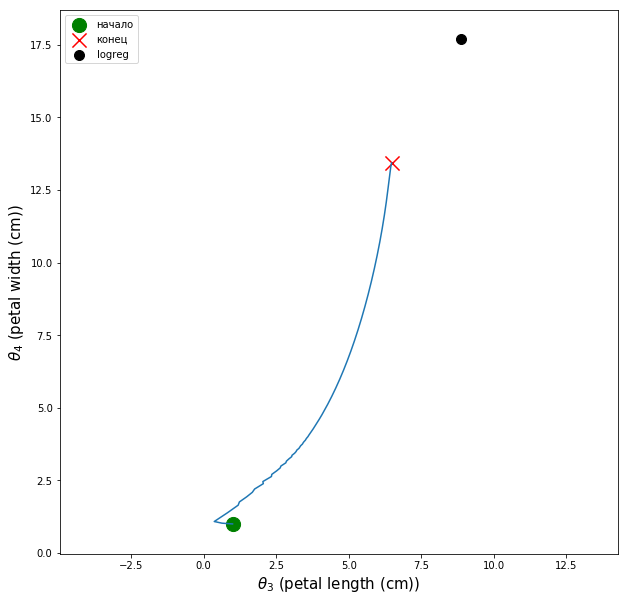

In [124]:
plot_descent(theta_history_momentum)

При использовании метода momentum начальные коллебания существенно уменьшаются.

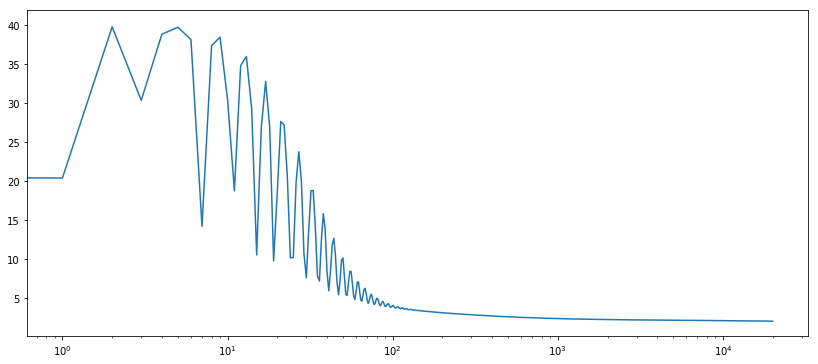

In [125]:
plot_mse_changing(mse_list_momentum)

In [126]:
y_prob_momentum = predict_proba(X_test, theta_momentum)
y_pred_momentum = predict(X_test, theta_momentum)

In [127]:
mean_squared_error(y_test, y_prob_momentum)

0.01617235872263262

In [128]:
confusion_matrix(y_test, y_pred_momentum)

array([[10,  0],
       [ 1,  9]])

### 4. Метод nesterov momentum

In [129]:
def nesterov_momentum(X, y, n=20000, learn_rate = 0.5, gamma = 0.95):
    """
    Функция для нахождения оптимальных значений к-ов theta методом nesterov momentum.
    Также функция возвращает историю изменения квадратов ошибок и к-ов theta_3 и theta_4.
    """
    theta = np.ones((X.shape[1]+1,))
    m = X.shape[0]
    mse_list = []
    X_grad = np.c_[(np.ones((X.shape[0],)), X)]
    learn_rate_per_m = learn_rate*(1-gamma)/m
    theta_history = [(1, 1)]
    grad_priv = np.zeros((X.shape[1]+1,))

    for i in range(n):
        errors = sigmoid(X_grad.dot(theta))-y
        mse = errors.T.dot(errors)
        grad_next = X_grad.T.dot(sigmoid(X_grad.dot(theta - gamma*grad_priv))-y)
        mse_list.append(mse)
        grad = gamma*grad_priv + learn_rate_per_m*grad_next
        if i>20:
            theta -= grad
        else:
            theta -= grad/(1 - gamma**(i+1))
        grad_priv = grad
        theta_history.append((theta[3], theta[4]))
    theta_history = np.array(theta_history)
    
    return theta, theta_history, mse_list

In [130]:
theta_nest_moment, theta_history_nest_moment, mse_list_nest_moment = nesterov_momentum(X_train, y_train)

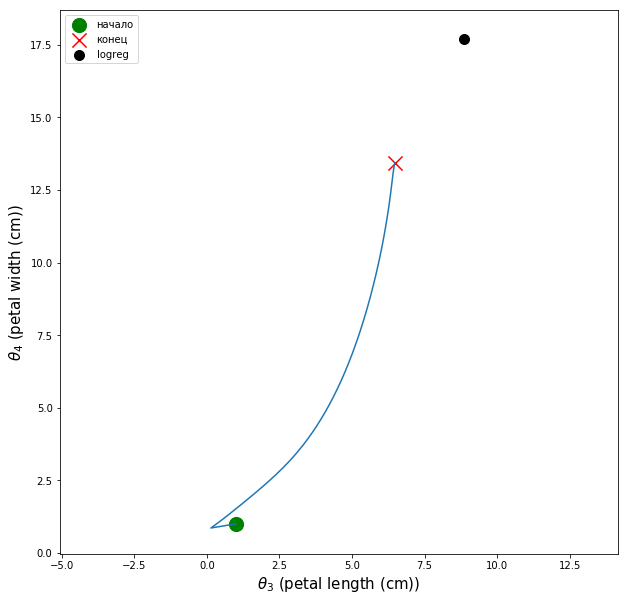

In [131]:
plot_descent(theta_history_nest_moment)

При использовании nesterov accelerated gradient колебания практически уходят.

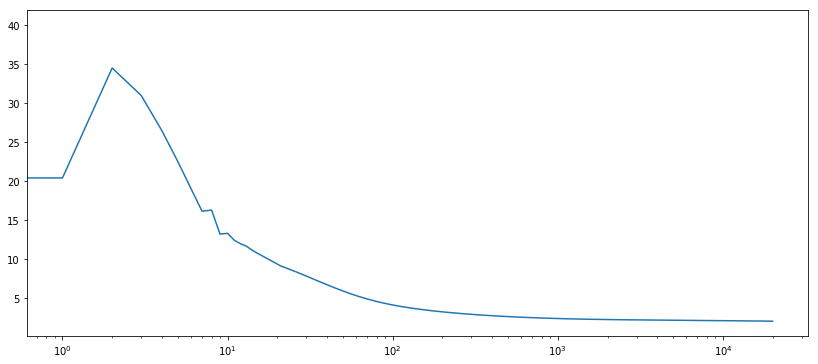

In [132]:
plot_mse_changing(mse_list_nest_moment)

In [133]:
y_prob_nest_moment = predict_proba(X_test, theta_nest_moment)
y_pred_nest_moment = predict(X_test, theta_nest_moment)

In [134]:
mean_squared_error(y_test, y_prob_nest_moment)

0.016128695509444565

In [135]:
confusion_matrix(y_test, y_pred_nest_moment)

array([[10,  0],
       [ 1,  9]])

### 5. Метод RMSPROP

In [136]:
def rmsprop(X, y, n=20000, eta = 0.01, gamma = 0.99, eps = 1e-8):
    """
    Функция для нахождения оптимальных значений к-ов theta методом RMSPROP.
    Также функция возвращает историю изменения квадратов ошибок и к-ов theta_3 и theta_4.
    """
    theta = np.ones((X.shape[1]+1,))
    m = X.shape[0]
    mse_list = []
    X_grad = np.c_[(np.ones((X.shape[0],)), X)]
    theta_history = [(1, 1)]
    grad_sq_avg_priv = np.zeros((X.shape[1]+1,))

    for i in range(n):
        errors = sigmoid(X_grad.dot(theta)) - y
        mse = errors.T.dot(errors)
        grad = X_grad.T.dot(sigmoid(X_grad.dot(theta))-y)/m
        grad_sq = grad**2
        grad_sq_avg = gamma*grad_sq_avg_priv + (1-gamma)*grad_sq
        mse_list.append(mse)
        if i>20:
            theta -= eta/np.sqrt(grad_sq_avg + eps)*grad
        else:
            theta -= eta/np.sqrt(grad_sq_avg + eps)*grad/(1 - 0.9**(i+1))

        grad_sq_avg_priv = grad_sq_avg
        theta_history.append((theta[3], theta[4]))
    theta_history = np.array(theta_history)
    
    return theta, theta_history, mse_list

In [137]:
theta_rmsprop, theta_history_rmsprop, mse_list_rmsprop = rmsprop(X_train, y_train)

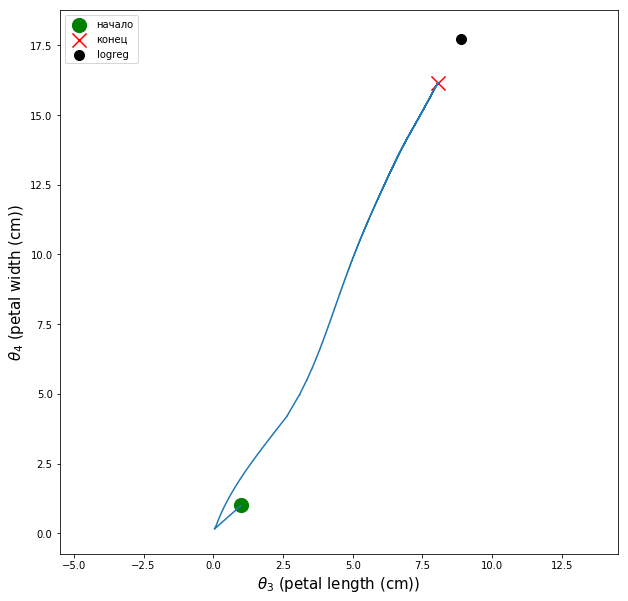

In [138]:
plot_descent(theta_history_rmsprop)

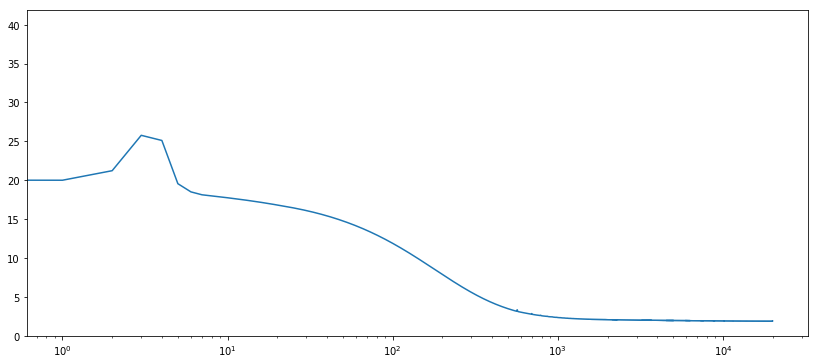

In [139]:
plot_mse_changing(mse_list_rmsprop)

In [140]:
y_prob_rmsprop = predict_proba(X_test, theta_rmsprop)
y_pred_rmsprop = predict(X_test, theta_rmsprop)

In [141]:
mean_squared_error(y_test, y_prob_rmsprop)

0.0004398975685882242

In [142]:
confusion_matrix(y_test, y_pred_rmsprop)

array([[10,  0],
       [ 0, 10]])

При использовании RMSPROP колебания также очень малыю. За 20000 итераций данный метод получил наименьшую сумму квадратов ошибок среди рассмотренных методов.